**INSTALLING AND IMPORTING LIBRARIES**

In [1]:
!pip install emoji
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=b7e24267c30a59ce35661a5ed172abc2e6b9713a7394ad78601da2d2c5c93344
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 43.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm

import re

import emoji

from spellchecker import SpellChecker
spell = SpellChecker()

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

from sklearn.feature_extraction.text import CountVectorizer

import random
from wordcloud import WordCloud
import seaborn as sns

In [3]:
nltk.download("punkt")
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**LOADING THE DATASET**

In [4]:
df = pd.read_csv("TweetsCOV19.csv")

In [5]:
# Inspect the first few rows of data
print(df.head())

# Check the size of the dataset
print("Size of dataset: ", df.shape)

# Check column names and types
print(df.info())

   Unnamed: 0              TweetId                          Username  \
0           0  1178793230223183872  bf05d1888dd974fa4a8679c25e2ead03   
1           1  1178798309491822592  00695cf79d60e86a5d0f872f4358337a   
2           2  1178806730358059008  6c9c28a4e449e0fe0d4d2ff449b8d6bc   
3           3  1178807288171130880  000000e6bded7cdeaffee6928df45050   
4           4  1178809851843006464  0fc683f42b4929419e796c5d0d97ce1b   

                   Timestamp  NoFollowers  NoFriends  NoRetweets  NoFavorites  \
0  2019-09-30 22:06:21+00:00         5018       1933           0            0   
1  2019-09-30 22:26:32+00:00         9009       4943          26           89   
2  2019-09-30 23:00:00+00:00       237005        559           2            3   
3  2019-09-30 23:02:13+00:00         1658         23           2            4   
4  2019-09-30 23:12:24+00:00     14231403         43           3           10   

                                            Entities Sentiment Mentions  \
0  va

In [6]:
# Because of computation limitations we choose 5000 samples

df = df.sample(frac = 0.45)

**EDA TO BE DONE**

In [7]:
# We drop all columns other than Sentiment and TweetText since they are irrelevant to this task

df = df.drop(["Unnamed: 0", "TweetId", "Username", "Timestamp", "NoFollowers", "NoFriends", "NoRetweets", "NoFavorites", "Entities", "Mentions", "Hashtags", "URLs", "UserLocation"], axis = 1)

In [8]:
# Inspect the first few rows of data
print(df.head())

# Check the size of the dataset
print("Size of dataset: ", df.shape)

# Check column names and types
print(df.info())

      Sentiment                                          TweetText
11188      3 -4  @RJinVegas @TMKSESPN @RealMichaelKay @DonLagre...
4933       1 -1  The arrival of rain/storms appears to be a lit...
16574      1 -3  These Little Munchkins, Little Fans of @iHrith...
11709      2 -4  After he had already cancelled it publicly, be...
7641       1 -1  @nickmagrino Hardware store, baybeee. Nicollet...
Size of dataset:  (10472, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10472 entries, 11188 to 20584
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  10472 non-null  object
 1   TweetText  10472 non-null  object
dtypes: object(2)
memory usage: 245.4+ KB
None


In [9]:
# Check for missing values

print(df.isnull().sum())

Sentiment    0
TweetText    0
dtype: int64


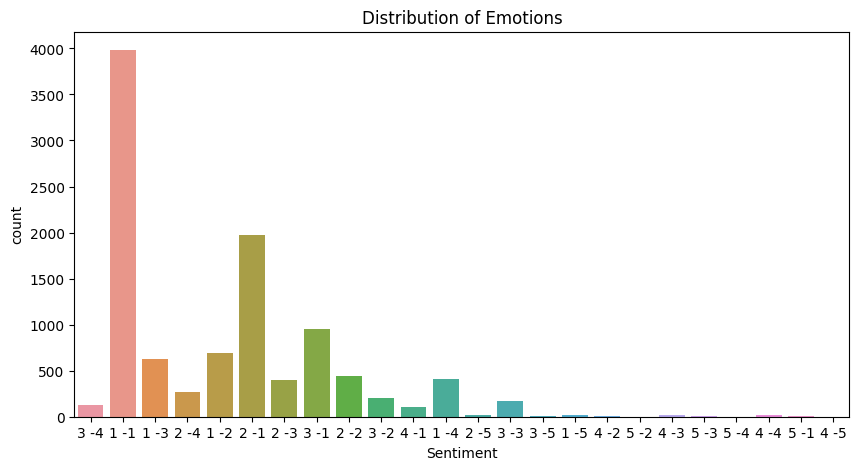

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Emotions')
plt.show()

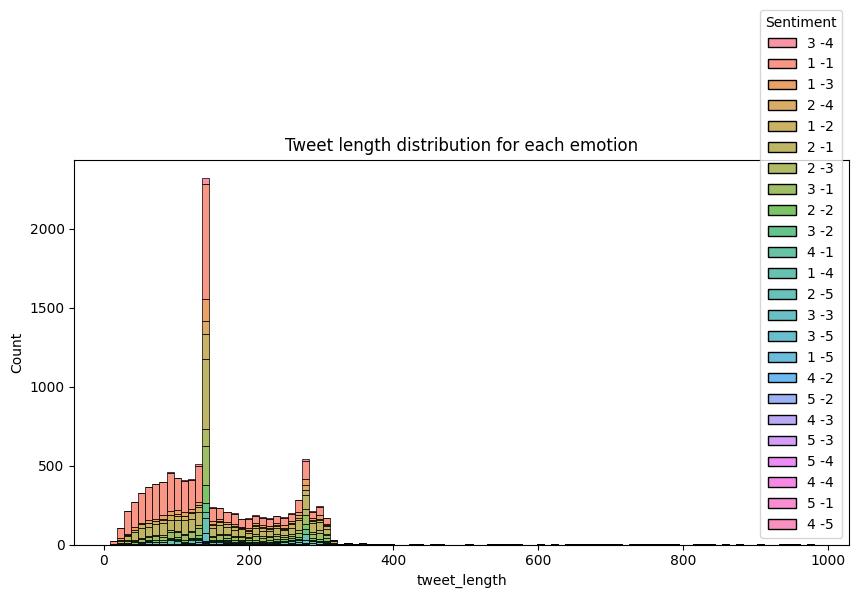

In [11]:
df['tweet_length'] = df['TweetText'].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(df, x="tweet_length", hue="Sentiment", multiple="stack")
plt.title('Tweet length distribution for each emotion')
plt.show()

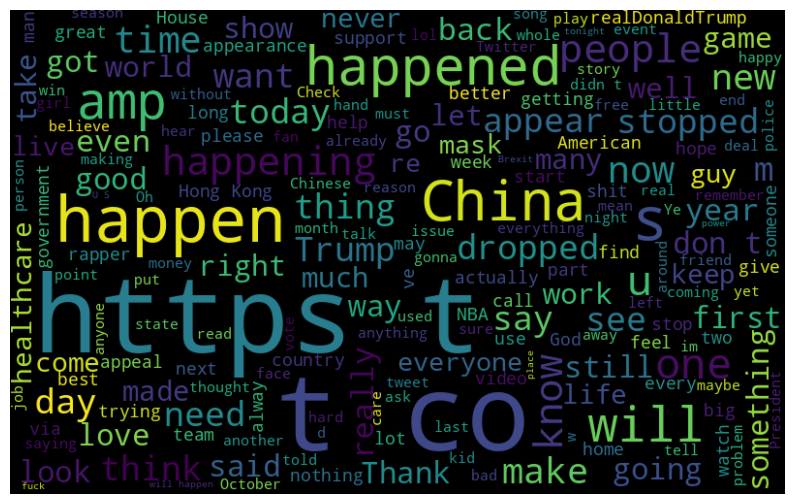

In [12]:
all_words = ' '.join([text for text in df['TweetText']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
# Most common ngrams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

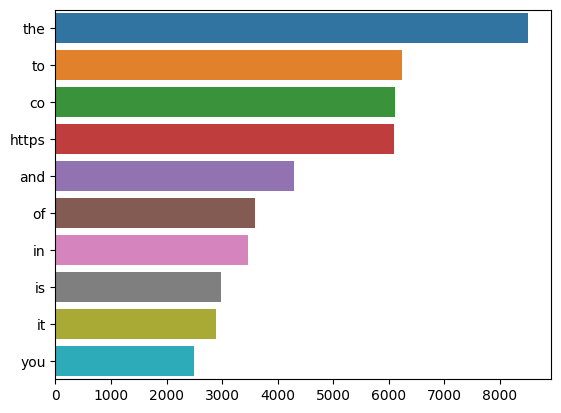

In [14]:
# Most common unigrams

top_n_bigrams = get_top_ngram(df['TweetText'], 1)[:10] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y, y=x)
plt.show()

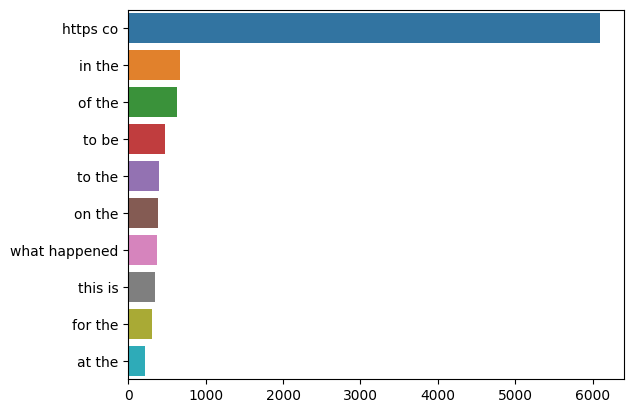

In [15]:
# Most common bigrams

top_n_bigrams = get_top_ngram(df['TweetText'], 2)[:10] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y, y=x)
plt.show()

**DATA PRE-PROCESSING**

In [16]:
# Define a function to correct spelling mistakes in a string
def correct_spelling(text):
    words = text.split()
    corrected_words = []
    for word in words:
        corrected_word = spell.correction(word)
        if corrected_word != None:
          corrected_words.append(corrected_word)
        # print(corrected_word)
    corrected_text = ' '.join(corrected_words)
    return corrected_text

In [17]:
abbreviations = {
    "w/": "with",
    "w/o": "without",
    "msg": "message",
    "u": "you",
    "r": "are",
    "lol": "laughing out loud",
    "np": "no problem",
    "LOL": "laughing out loud",
    "XD" : "laugh",
    "xd" : "laugh"
}

# Define a function to correct abbreviations in a string
def correct_abbreviations(text, abbreviations):
    words = text.split()
    corrected_words = []
    for word in words:
        if word in abbreviations:
            corrected_word = abbreviations[word]
            corrected_words.append(corrected_word)
        else:
            corrected_words.append(word)
    corrected_text = ' '.join(corrected_words)
    return corrected_text

In [18]:
def preprocess_tweets(tweet):
  # Convert all words to lower case
  tweet = tweet.lower()

  # Remove all punctuations
  tweet = tweet.translate(str.maketrans('', '', string.punctuation))

  # Remove all stop words
  # Tokenize the sentence
  tokens = nltk.word_tokenize(tweet)
  # Remove stop words
  clean_tokens = [token for token in tokens if not token.lower() in stop_words]
  # Join the tokens back into a sentence
  tweet = ' '.join(clean_tokens)

  # Removing HTML Tags, URLs and Website Links
  # Removing Website Links
  temp_text = tweet.split()

  for i in temp_text:
    if i[-4:] == ".com" or i[:4] == "www.":
      temp_text.remove(i)

  tweet = ' '.join(temp_text)

  # Remove HTML tags
  clean_text = re.sub('<[^<]+?>', '', tweet)

  # Remove URLs
  clean_text = re.sub(r'http\S+', '', clean_text)

  tweet = clean_text

  # Remove numbers
  tweet = re.sub(r'\d+', '', tweet)

  # Deemojize Emojis
  tweet = emoji.demojize(tweet)

  # Correct Abbreviations
  tweet = correct_abbreviations(tweet, abbreviations)

  # Remove mentions
  tweet = re.sub(r'@\w+', '', tweet)

  # Stemming
  # Tokenize the sentence
  tokens = nltk.word_tokenize(tweet)

  # Stem the tokens
  stemmed_tokens = [stemmer.stem(token) for token in tokens]

  # Join the stemmed tokens back into a sentence
  tweet = ' '.join(stemmed_tokens)

    # Spellcheck
  try:
    tweet = correct_spelling(tweet)
  except Exception as e:
    print(e)

  return tweet  

In [19]:
df["TweetText"] = df["TweetText"].map(preprocess_tweets)
df.head()

,Sentiment,TweetText,tweet_length
11188,3 -4,hey re go back listen rip hung cry jump proud ...,359
4933,1 -1,arrive rainstorm appear little slower thursday...,259
16574,1 -3,little munchkin little fan show stopper today ...,204
11709,2 -4,already cancel publicly time got uncouth boor ...,279
7641,1 -1,hardware store maybe nicole hardware appear so...,189


In [20]:
# Downloading the .csv of the preprocessed Dataframe

df.to_csv("TweetsCOV19_preprocessed.csv",index = False)

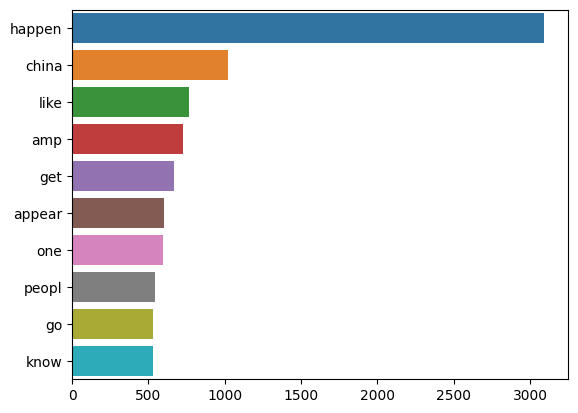

In [21]:
# Most common unigrams

top_n_bigrams = get_top_ngram(df['TweetText'], 1)[:10] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y, y=x)
plt.show()

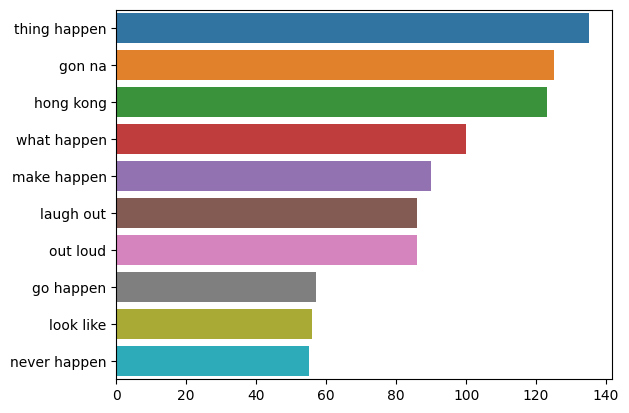

In [22]:
# Most common bigrams

top_n_bigrams = get_top_ngram(df['TweetText'], 2)[:10] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y, y=x)
plt.show()

In [23]:
# Split the data into train and validation sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

In [24]:
train.info()
test.info()
val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6701 entries, 10422 to 9010
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sentiment     6701 non-null   object
 1   TweetText     6701 non-null   object
 2   tweet_length  6701 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 209.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 15725 to 2139
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sentiment     2095 non-null   object
 1   TweetText     2095 non-null   object
 2   tweet_length  2095 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 65.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 15600 to 13682
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sentiment     1676 non-null   object
 1   TweetText     1